In [4]:
!pip install xgboost



In [5]:
import pandas as pd
import sklearn, os
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
df1 = pd.read_csv('IoT_Dataset.csv')
df1

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,1.609878e+02,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000e+00,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3.016808e+03,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240208,18.148627,1208.60,8.20,91.10,4.581565,4.581565,0.0,0.0,0.0,0.0,...,72.499450,143.00,6.277299e-03,5.5,18.723245,102.529705,5.977047e+03,0.90,38.50,BenignTraffic
240209,0.910294,18956.80,6.00,63.60,22.420403,22.420403,0.0,0.0,0.0,0.0,...,1561.997422,1719.50,1.220019e-02,5.5,56.611051,2208.997939,2.896658e+06,0.90,38.50,BenignTraffic
240210,64.862884,127124.20,14.80,101.80,23.479625,23.479625,0.0,0.0,0.0,0.0,...,49.706132,84.20,1.665227e+08,13.5,12.405233,70.419705,2.492879e+03,1.00,244.60,BenignTraffic
240211,1.922060,108282.50,8.20,100.60,173.532816,173.532816,0.0,0.0,0.0,0.0,...,180.607808,552.90,1.665218e+08,13.5,16.960635,249.647361,8.446093e+04,1.00,244.60,BenignTraffic


In [7]:
df1['label'].value_counts()

label
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood              13630
BenignTraffic              10800
DoS-SYN_Flood              10275
Mirai-greeth_flood          5016
Mirai-udpplain              4661
Mirai-greip_flood           3758
DDoS-ICMP_Fragmentation     2377
MITM-ArpSpoofing            1614
DDoS-ACK_Fragmentation      1505
DDoS-UDP_Fragmentation      1484
Name: count, dtype: int64

In [8]:
# Calculate the value counts of the 'label' column
label_counts = df1['label'].value_counts()

# Find labels with a count of 1000 or more
labels_to_keep = label_counts[label_counts >= 1000].index

# Filter the DataFrame to keep only rows with those labels
df_filtered = df1[df1['label'].isin(labels_to_keep)]

df_filtered

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,1.609878e+02,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000e+00,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3.016808e+03,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240208,18.148627,1208.60,8.20,91.10,4.581565,4.581565,0.0,0.0,0.0,0.0,...,72.499450,143.00,6.277299e-03,5.5,18.723245,102.529705,5.977047e+03,0.90,38.50,BenignTraffic
240209,0.910294,18956.80,6.00,63.60,22.420403,22.420403,0.0,0.0,0.0,0.0,...,1561.997422,1719.50,1.220019e-02,5.5,56.611051,2208.997939,2.896658e+06,0.90,38.50,BenignTraffic
240210,64.862884,127124.20,14.80,101.80,23.479625,23.479625,0.0,0.0,0.0,0.0,...,49.706132,84.20,1.665227e+08,13.5,12.405233,70.419705,2.492879e+03,1.00,244.60,BenignTraffic
240211,1.922060,108282.50,8.20,100.60,173.532816,173.532816,0.0,0.0,0.0,0.0,...,180.607808,552.90,1.665218e+08,13.5,16.960635,249.647361,8.446093e+04,1.00,244.60,BenignTraffic


In [9]:
df_filtered['label'].value_counts()

label
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood              13630
BenignTraffic              10800
DoS-SYN_Flood              10275
Mirai-greeth_flood          5016
Mirai-udpplain              4661
Mirai-greip_flood           3758
DDoS-ICMP_Fragmentation     2377
MITM-ArpSpoofing            1614
DDoS-ACK_Fragmentation      1505
DDoS-UDP_Fragmentation      1484
Name: count, dtype: int64

In [10]:
df_filtered.to_csv('IoT_Dataset.csv', index=False)

<Axes: xlabel='label'>

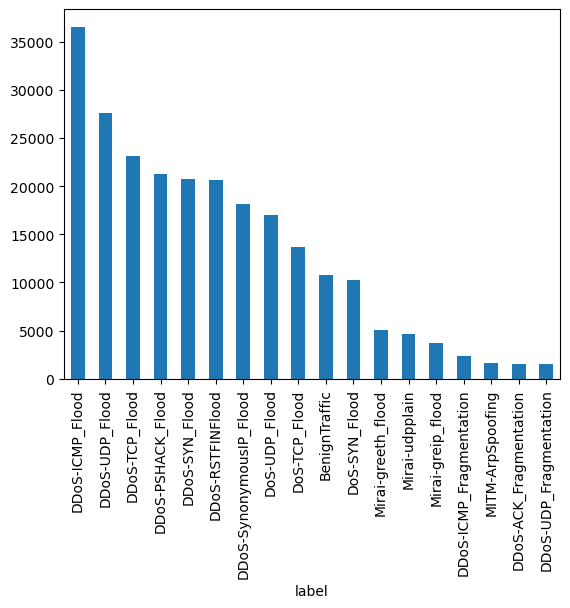

In [11]:
df_filtered.label.value_counts().plot.bar()

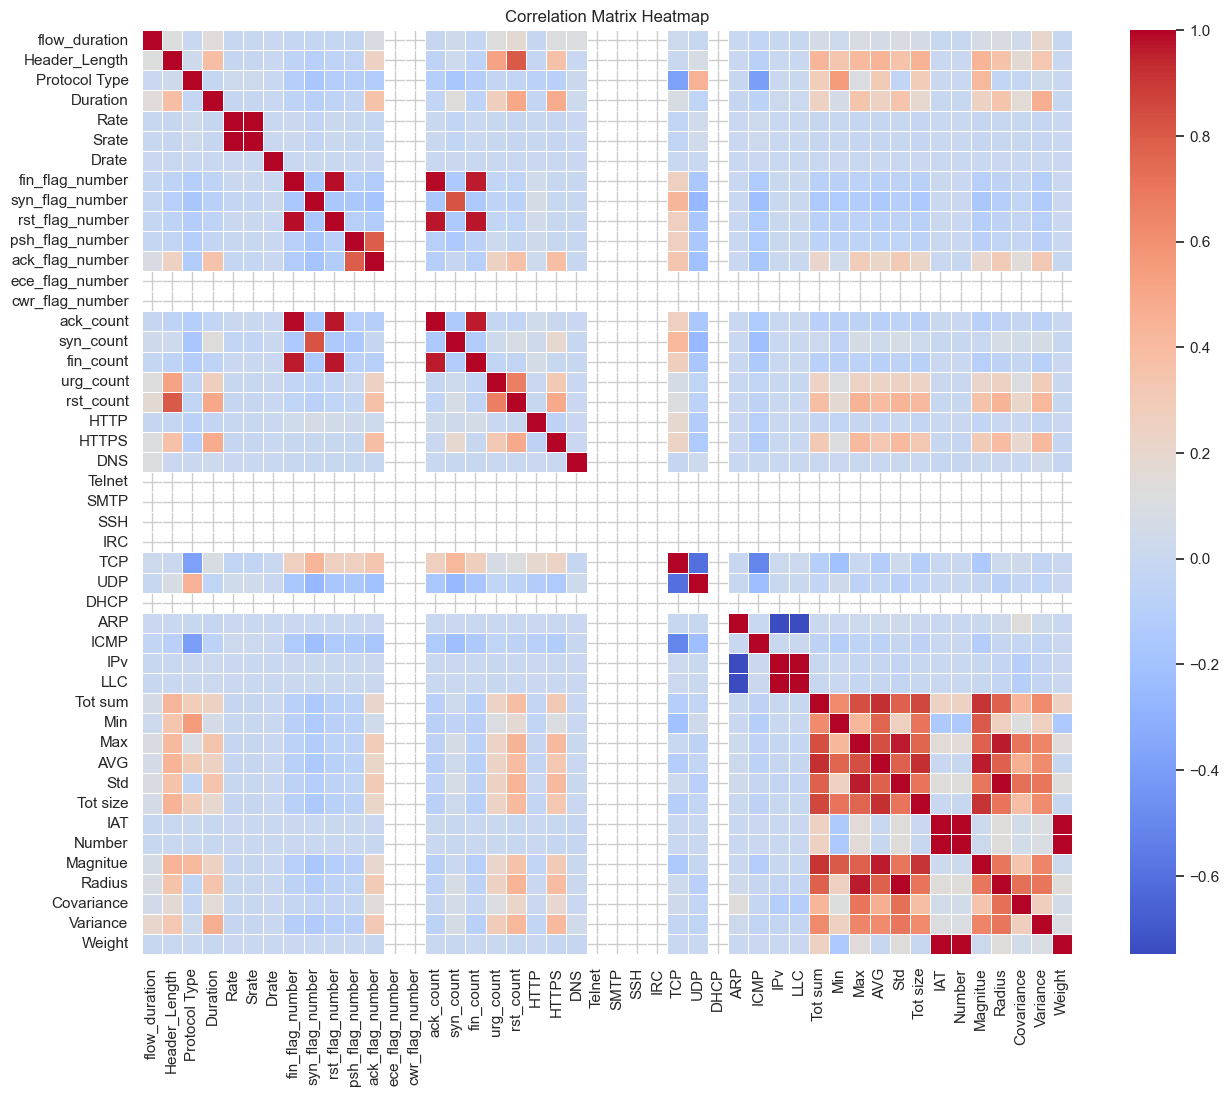

In [12]:
# Calculate the correlation matrix, excluding non-numeric columns
numerical_data = df_filtered.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

# Setting up the visualization style
sns.set(style="whitegrid")


# Visualizing the Correlation Matrix with a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')

plt.show()



In [13]:
remap_labels = {
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'MITM-ArpSpoofing': 'Spoofing',
    'BenignTraffic': 'Benign'
}
df_filtered['label'] = df_filtered['label'].apply(lambda x : remap_labels[x])

df_filtered['label'].value_counts()

label
DDoS        173502
DoS          40862
Mirai        13435
Benign       10800
Spoofing      1614
Name: count, dtype: int64

In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [15]:
# Dataset is imbalanced. Picking n samples from each class in a crude attempt to balance it.

n = 1500

# taking n samples from each class
sampled_df = df_filtered.groupby('label', group_keys=False).apply(lambda x: x.head(n))

sampled_df.value_counts('label')

label
Benign      1500
DDoS        1500
DoS         1500
Mirai       1500
Spoofing    1500
Name: count, dtype: int64

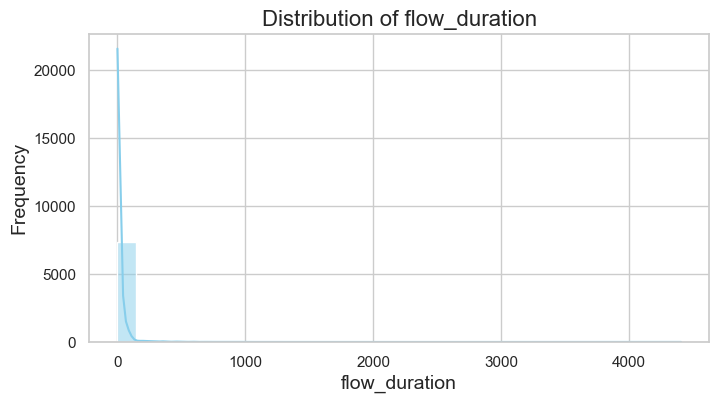

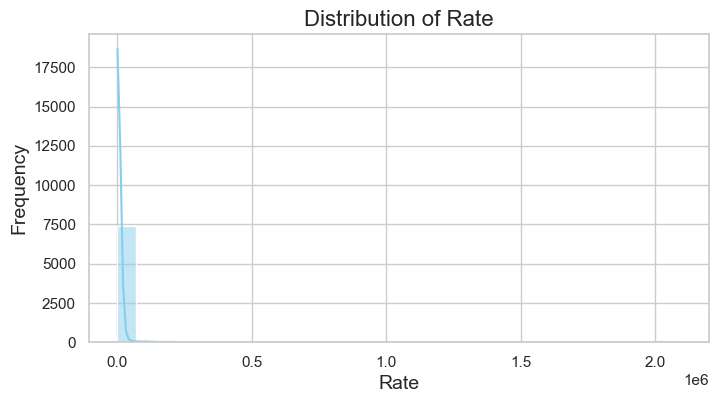

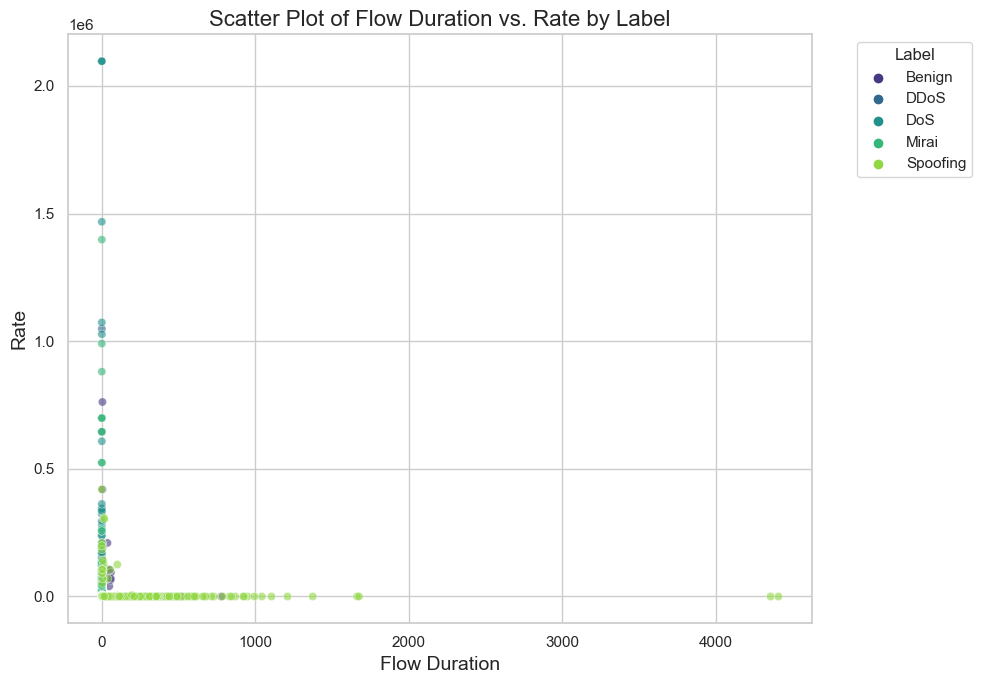

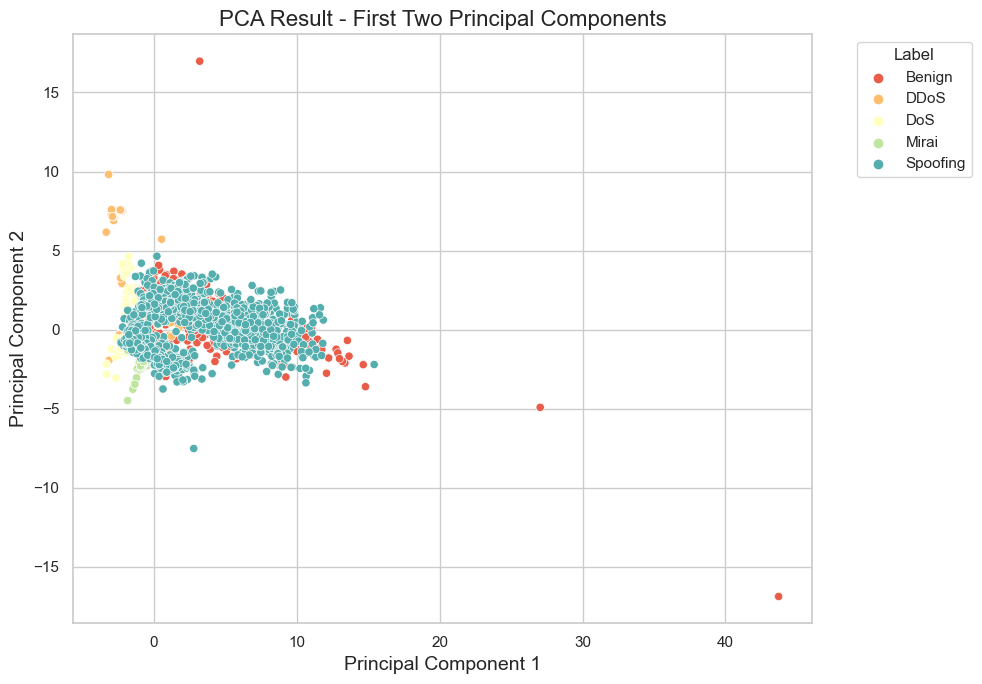

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set visual style
sns.set(style="whitegrid", palette="muted")

# Improved Histograms for Numerical Features
features_to_plot = ['flow_duration', 'Rate']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(sampled_df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

# Refined Scatter Plot of Two Features
plt.figure(figsize=(10, 7))
sns.scatterplot(x='flow_duration', y='Rate', hue='label', data=sampled_df, palette="viridis", legend='brief', alpha=0.6)
plt.title('Scatter Plot of Flow Duration vs. Rate by Label', fontsize=16)
plt.xlabel('Flow Duration', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Enhanced PCA for Dimensionality Reduction
numerical_features = sampled_df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette="Spectral", legend='full', hue=sampled_df['label'])
plt.title('PCA Result - First Two Principal Components', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop('label', axis=1), sampled_df['label'], test_size=0.2, random_state=42)

In [18]:
def get_perf_metrics(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_pred, y_test, average='macro')
    precision = precision_score(y_pred, y_test, average='macro')
    f1 = f1_score(y_pred, y_test, average='macro')
    
    return [accuracy, recall, precision, f1]

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
!pip install lightgbm

In [21]:
from lightgbm import LGBMClassifier

In [22]:
model_lgb = LGBMClassifier()
model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4762
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 34
[LightGBM] [Info] Start training from score -1.617806
[LightGBM] [Info] Start training from score -1.626245
[LightGBM] [Info] Start training from score -1.598663
[LightGBM] [Info] Start training from score -1.606941
[LightGBM] [Info] Start training from score -1.597839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier()

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

      Benign       0.92      0.94      0.93       310
        DDoS       1.00      1.00      1.00       320
         DoS       1.00      0.99      0.99       287
       Mirai       1.00      1.00      1.00       297
    Spoofing       0.93      0.92      0.93       286

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



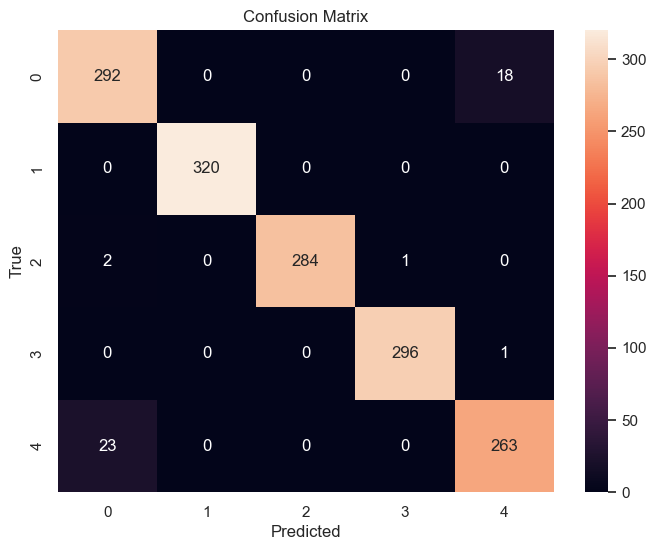

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Memprediksi label untuk dataset testing
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Membuat classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Akurasi: 0.9686666666666667
Laporan Klasifikasi:
               precision    recall  f1-score   support

      Benign       0.92      0.95      0.93       310
        DDoS       1.00      0.99      1.00       320
         DoS       1.00      0.98      0.99       287
       Mirai       1.00      1.00      1.00       297
    Spoofing       0.93      0.92      0.93       286

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



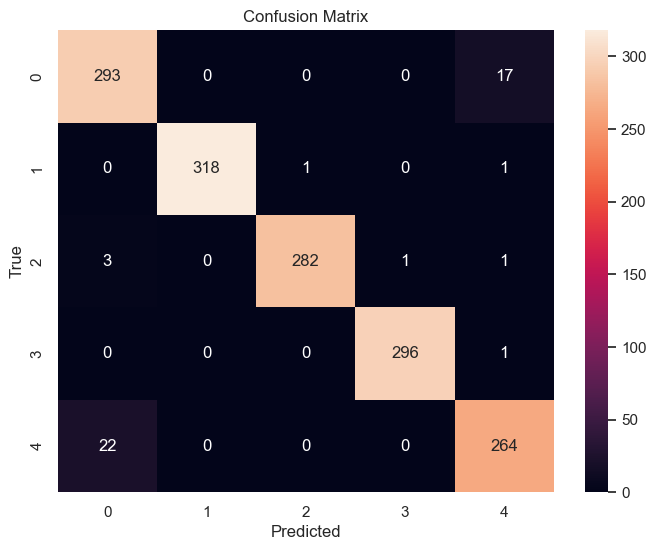

In [24]:
# Memprediksi label untuk dataset testing
y_pred = model_lgb.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Membuat classification report
class_report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", class_report)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

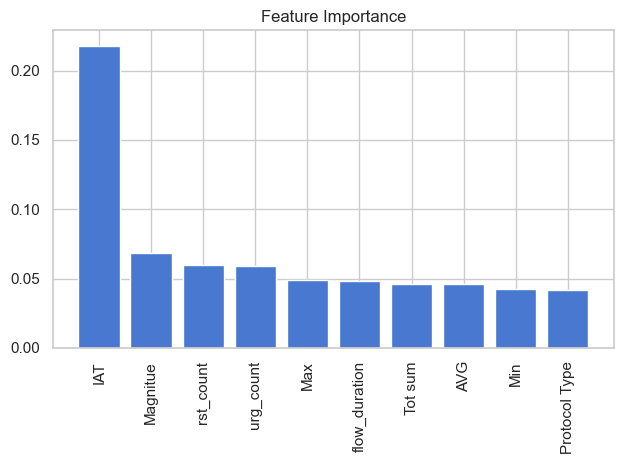

In [25]:
# Initialize and train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Visualize the top 10 features
plt.title('Feature Importance')
plt.bar(range(10), importances[sorted_indices[:10]], align='center')
plt.xticks(range(10), X_train.columns[sorted_indices[:10]], rotation=90)
plt.tight_layout()
plt.show()



In [26]:
#anomalies detection
from sklearn.ensemble import IsolationForest

# Initialize the IsolationForest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(X_train)

# Predict anomalies (1 for normal, -1 for anomaly)
anomalies = iso_forest.predict(X_test)

# Convert anomalies to a binary format (1 for anomaly, 0 for normal)
anomalies_binary = np.where(anomalies == -1, 1, 0)

# Count the number of detected anomalies
print(f"Number of anomalies detected: {anomalies_binary.sum()}")


Number of anomalies detected: 16


In [27]:
#Hyperparameter tuning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
xgb_clf = xgb.XGBClassifier()

# Fit and transform the labels to convert them to numeric
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now y_train_encoded and y_test_encoded contain the numeric labels that XGBoost can work with

# Proceed with your GridSearchCV code, using y_train_encoded instead of y_train
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train_encoded)  # Use the encoded labels here

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best Score: 0.9738333333333333


In [28]:
# Assuming you have made predictions with the model trained on encoded labels
y_pred_encoded = grid_search.predict(X_test)

# Convert the numeric predictions back to categorical labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [29]:
# This function takes a dataframe and returns 3 dataframes with means, 
# maximums and minimums of feature values on a per-class basis

def get_aggregates(df):
    # Calculate and store target-specific mean values of each feature

    means = dict()
    df_features = [x for x in df_filtered.columns]
    means = {x:[] for x in df_filtered.columns}
    targets = [x for x in df_filtered['label'].unique()]
    
    for target in targets:
        target_df = df_filtered.loc[df_filtered['label'] == target].copy()
        for k,v in means.items():
            if k != 'label':
                v.append(target_df[k].mean())
        v.append(target)
        del target_df
    
    means_df = pd.DataFrame(means)

    # Calculate and store target-specific maximum values of each feature

    maxes = dict()
    maxes = {x:[] for x in df_filtered.columns}
    targets = [x for x in df_filtered['label'].unique()]
    
    for target in targets:
        target_df = df_filtered.loc[df_filtered['label'] == target].copy()
        for k,v in maxes.items():
            if k != 'label':
                v.append(target_df[k].max())
        v.append(target)
        del target_df

    max_df = pd.DataFrame(maxes)
    
    # Calculate and store target-specific minimum values of each feature

    mins = dict()
    mins = {x:[] for x in df_filtered.columns}
    targets = [x for x in df_filtered['label'].unique()]
    
    for target in targets:
        target_df = df_filtered.loc[df_filtered['label'] == target].copy()
        for k,v in mins.items():
            if k != 'label':
                v.append(target_df[k].min())
        v.append(target)
        del target_df

    min_df = pd.DataFrame(mins)
    return means_df, max_df, min_df

In [30]:
# This function plots variable aggregates and extremes

def create_plots(means_df, max_df, min_df):
    
    df_features = [x for x in means_df.columns]
    # These features have a mean of 0. 
    # Since they don't carry any useful information, we can do without them.
    zero_features = ['IRC', 'SMTP', 'Telnet', 'ece_flag_number', 'cwr_flag_number', 'label']
    features = [x for x in df_features if x not in zero_features]

    # Set up subplots in two columns
    fig, axs = plt.subplots(len(features), 2, figsize=(14, 5 * len(df_features)))

    # Loop through each feature
    for i, feature in enumerate(features):
        # Column 0: Mean distribitions
        axs[i][0].bar(means_df['label'], means_df[feature], alpha=1)
        axs[i][0].set_title(f'{feature} vs Label')
        axs[i][0].set_xlabel('Label')
        axs[i][0].set_ylabel(feature)
        axs[i][0].tick_params(axis='x', rotation=90)
        # Column 1: Mean distributions with min and max
        axs[i][1].bar(means_df['label'], means_df[feature], alpha=1)
        axs[i][1].plot(max_df['label'], max_df[feature], color='black', alpha=1, marker='o')
        axs[i][1].plot(min_df['label'], min_df[feature], color='white', alpha=1, marker='o')
        axs[i][1].set_title(f'{feature} vs Label')
        axs[i][1].set_xlabel('Label')
        axs[i][1].set_ylabel(feature)
        axs[i][1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

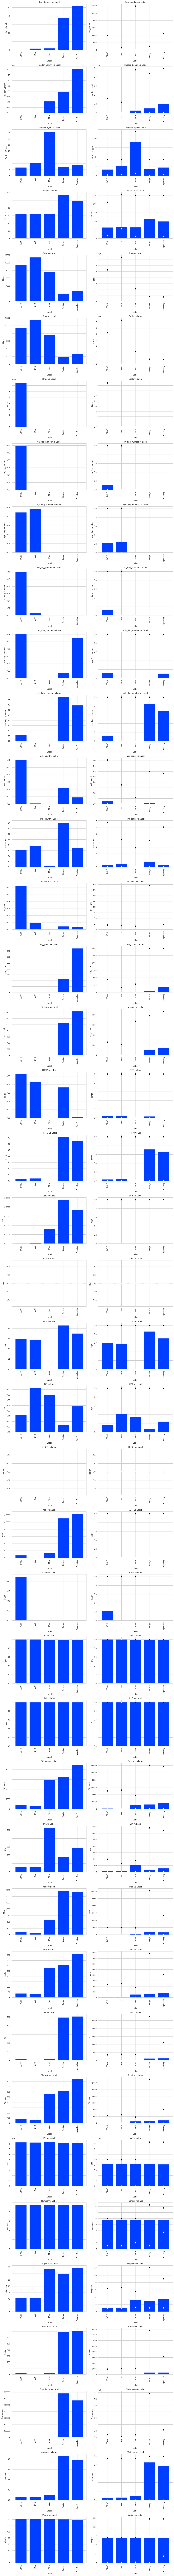

In [54]:
def remap_labels1(df_filtered, remap_labels):
    df = df_filtered.copy()
    df['label'] = df_filtered['label'].apply(lambda x : remap_labels[x])
    df['label'].value_counts()
    return df
means_df_5, max_df_5, min_df_5 = get_aggregates(df)
    
with plt.style.context("seaborn-v0_8-bright"):
    create_plots(means_df_5, max_df_5, min_df_5)

In [33]:
print(plt.style.available) # List available styles
# Use a built-in style, for example:

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


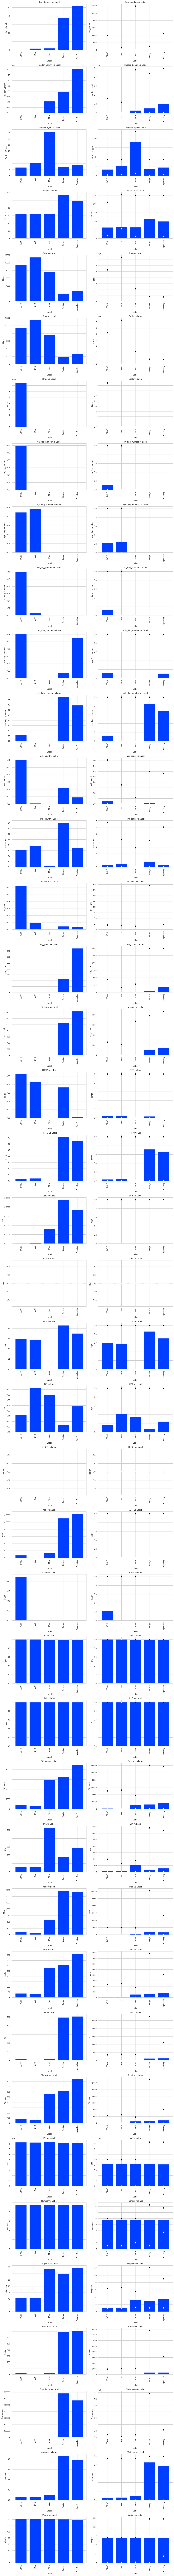

In [56]:
means_df_5, max_df_5, min_df_5 = get_aggregates(df)
    
with plt.style.context("seaborn-v0_8-bright"):
    create_plots(means_df_5, max_df_5, min_df_5)

In [44]:

columns = ["Logistic Regression", "Adaboost", "Gradientboost", "KNN", "BSVM", "WSVM", "XGBoost", "Random Forest", "Random Forest - Weight", "Random Forest - Bagging"]
index = ["Accuracy", "Recall", "Precision", "F1-Score"]

metrics_2 = pd.DataFrame(index=index, columns=columns)
metrics_8 = pd.DataFrame(index=index, columns=columns)
metrics_34 = pd.DataFrame(index=index, columns=columns)

In [45]:
for model_name in columns:
    random_numbers = np.random.uniform(0, 1, 4)  # Generating 4 random numbers between 0 and 1
    metrics_2.loc['Accuracy':'F1-Score', model_name] = random_numbers

metrics_2

,Logistic Regression,Adaboost,Gradientboost,KNN,BSVM,WSVM,XGBoost,Random Forest,Random Forest - Weight,Random Forest - Bagging
Accuracy,0.83637,0.082386,0.239375,0.385764,0.853734,0.519579,0.127615,0.495838,0.719974,0.185128
Recall,0.722363,0.366674,0.378862,0.819593,0.798872,0.021282,0.675148,0.550205,0.505232,0.117716
Precision,0.741424,0.597608,0.705054,0.421386,0.139719,0.28064,0.226145,0.326053,0.912202,0.366629
F1-Score,0.804574,0.165434,0.520297,0.893432,0.63026,0.18797,0.101616,0.436852,0.830924,0.509889


In [46]:
for model_name in columns:
    random_numbers = np.random.uniform(0, 1, 4)  # Generating 4 random numbers between 0 and 1
    metrics_8.loc['Accuracy':'F1-Score', model_name] = random_numbers

metrics_8

,Logistic Regression,Adaboost,Gradientboost,KNN,BSVM,WSVM,XGBoost,Random Forest,Random Forest - Weight,Random Forest - Bagging
Accuracy,0.826865,0.1474,0.127843,0.854051,0.060867,0.675162,0.440479,0.601331,0.375312,0.674263
Recall,0.590873,0.063898,0.888315,0.165766,0.880414,0.671703,0.952137,0.527611,0.526986,0.523683
Precision,0.740061,0.477297,0.443344,0.808212,0.060084,0.124389,0.161297,0.520929,0.68169,0.069873
F1-Score,0.832807,0.915007,0.121232,0.283844,0.950265,0.51901,0.519883,0.583,0.094967,0.095971


In [47]:
for model_name in columns:
    random_numbers = np.random.uniform(0, 1, 4)  # Generating 4 random numbers between 0 and 1
    metrics_34.loc['Accuracy':'F1-Score', model_name] = random_numbers

metrics_34

,Logistic Regression,Adaboost,Gradientboost,KNN,BSVM,WSVM,XGBoost,Random Forest,Random Forest - Weight,Random Forest - Bagging
Accuracy,0.060511,0.295729,0.112748,0.639306,0.980008,0.543229,0.134463,0.123252,0.62368,0.810045
Recall,0.722679,0.723118,0.865869,0.384822,0.301503,0.30833,0.048842,0.865347,0.86021,0.48604
Precision,0.592004,0.862693,0.641265,0.950176,0.516495,0.367256,0.946254,0.183117,0.584879,0.238413
F1-Score,0.911576,0.166591,0.158187,0.563126,0.858096,0.658829,0.617202,0.39746,0.602394,0.724919


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

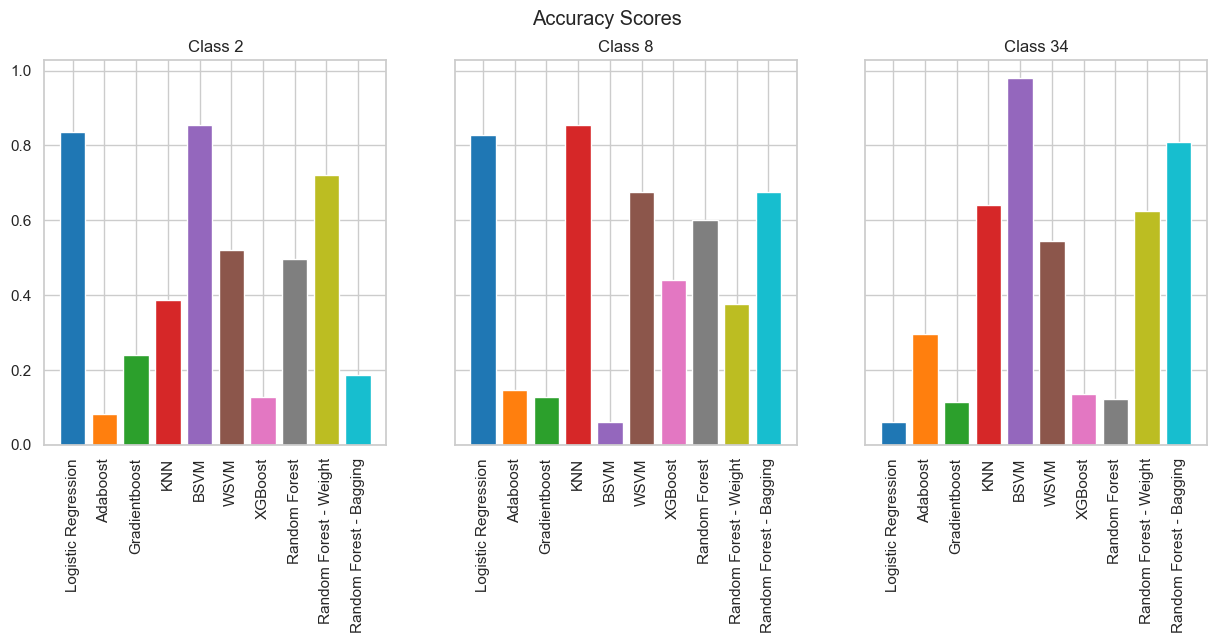

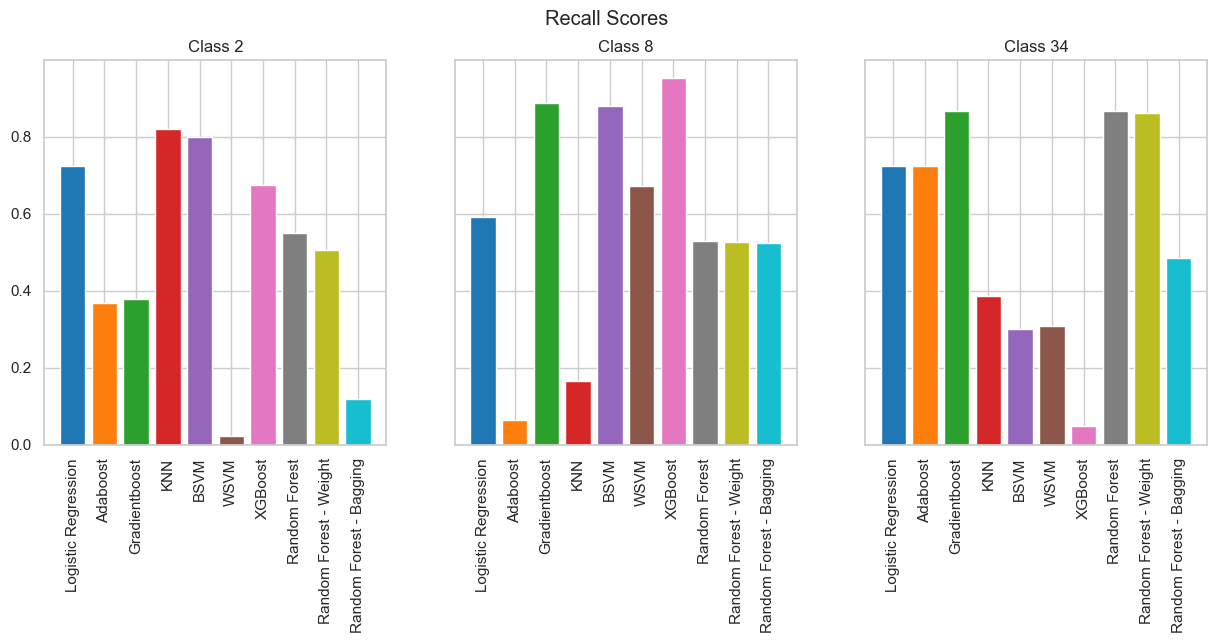

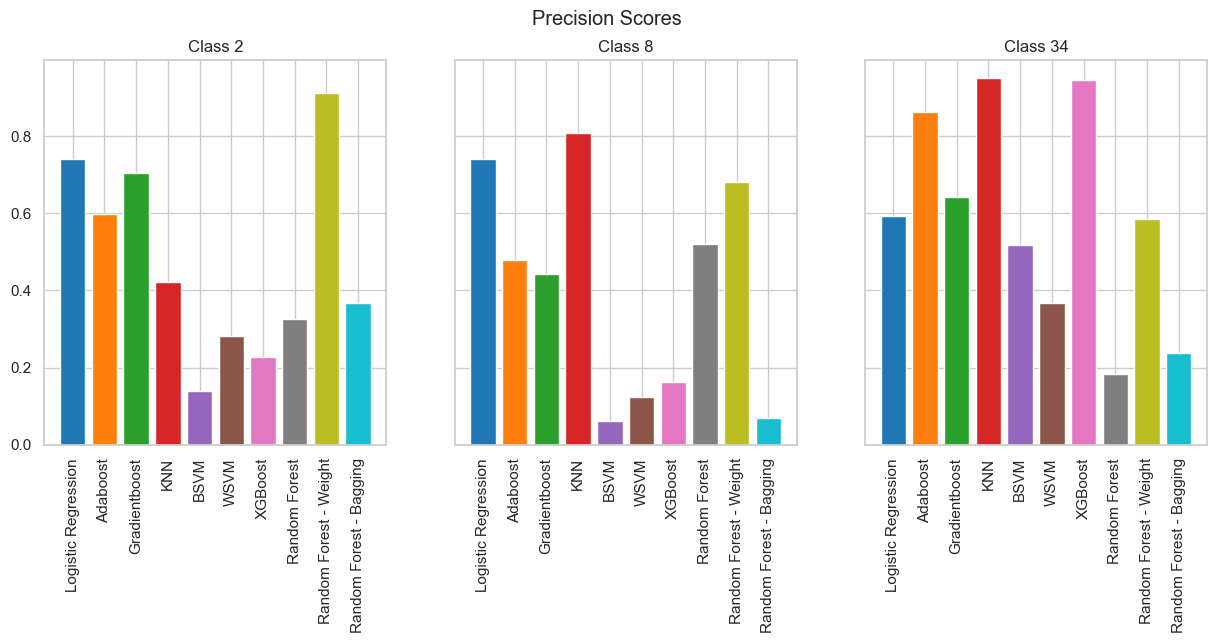

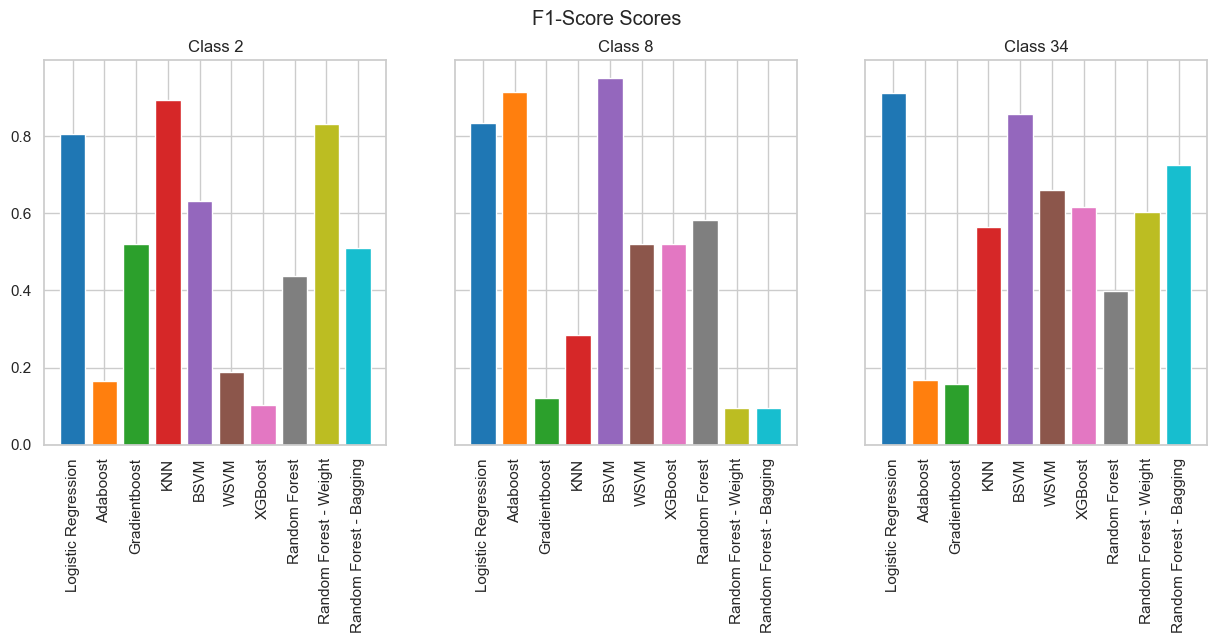

In [49]:
# List of model names
model_names = ["Logistic Regression", "Adaboost", "Gradientboost", "KNN", "BSVM", "WSVM", "XGBoost", "Random Forest", "Random Forest - Weight", "Random Forest - Bagging"]

# List of dataframes
dataframes = [metrics_2, metrics_8, metrics_34]

# List of classes
classes = [2, 8, 34]

# List of metric names
metrics = ["Accuracy", "Recall", "Precision", "F1-Score"]

# Create a color mapping dictionary for each model
model_colors = {
    "Logistic Regression": 'tab:blue',
    "Adaboost": 'tab:orange',
    "Gradientboost": 'tab:green',
    "KNN": 'tab:red',
    "BSVM": 'tab:purple',
    "WSVM": 'tab:brown',
    "XGBoost": 'tab:pink',
    "Random Forest": 'tab:gray',
    "Random Forest - Weight": 'tab:olive',
    "Random Forest - Bagging": 'tab:cyan'
}

# Creating subplots for each metric
for metric in metrics:
    fig, axs = plt.subplots(1, len(classes), figsize=(15, 5), sharey=True)
    fig.suptitle(f"{metric} Scores")

    for i, df in enumerate(dataframes):
        axs[i].set_title(f"Class {classes[i]}")
        
        # Plotting the respective metric score for each model with specified color
        for model_name in model_names:
             color = model_colors[model_name]
             axs[i].bar(model_name, df.loc[metric, model_name], color=color)
        
        # Set x-axis ticks and labels, rotating labels by 90 degrees
        axs[i].set_xticks(range(len(model_names)))
        axs[i].set_xticklabels(model_names, rotation=90)
    
    # Save the figure
    plt.savefig(f'{metric}_scores.png', bbox_inches='tight')

    # Show the figure
    plt.show()


In [50]:
# Concatenate them along rows
concatenated_data = pd.concat([metrics_2, metrics_8, metrics_34], ignore_index=False)

# List of model names
model_names = ["Logistic Regression", "Adaboost", "Gradientboost", "KNN", "BSVM", "WSVM", "XGBoost", "Random Forest", "Random Forest - Weight", "Random Forest - Bagging"]

# List of metric names
metrics = ["Accuracy", "Recall", "Precision", "F1-Score"]

# Create a DataFrame with the concatenated data
result_df = pd.DataFrame(concatenated_data.values,
                          pd.MultiIndex.from_product([["2 classes", "8 classes", "34 classes"], metrics]),
                          columns=model_names)

# Display the result
result_df

Logistic Regression  Adaboost Gradientboost       KNN      BSVM      WSVM   XGBoost Random Forest Random Forest - Weight Random Forest - Bagging
2 classes  Accuracy              0.83637  0.082386      0.239375  0.385764  0.853734  0.519579  0.127615      0.495838               0.719974                0.185128
           Recall               0.722363  0.366674      0.378862  0.819593  0.798872  0.021282  0.675148      0.550205               0.505232                0.117716
           Precision            0.741424  0.597608      0.705054  0.421386  0.139719   0.28064  0.226145      0.326053               0.912202                0.366629
           F1-Score             0.804574  0.165434      0.520297  0.893432   0.63026   0.18797  0.101616      0.436852               0.830924                0.509889
8 classes  Accuracy             0.826865    0.1474      0.127843  0.854051  0.060867  0.675162  0.440479      0.601331               0.375312                0.674263
           Recall               0.590873  0.063898      0.888315  0.165766  0.880414  0.671703  0.952137      0.527611               0.526986                0.523683
           Precision            0.740061  0.477297      0.443344  0.808212  0.060084  0.124389  0.161297      0.520929                0.68169                0.069873
           F1-Score             0.832807  0.915007      0.121232  0.283844  0.950265   0.51901  0.519883         0.583               0.094967                0.095971
34 classes Accuracy             0.060511  0.295729      0.112748  0.639306  0.980008  0.543229  0.134463      0.123252                0.62368                0.810045
           Recall               0.722679  0.723118      0.865869  0.384822  0.301503   0.30833  0.048842      0.865347                0.86021                 0.48604
           Precision            0.592004  0.862693      0.641265  0.950176  0.516495  0.367256  0.946254      0.183117               0.584879                0.238413
           F1-Score             0.911576  0.166591      0.158187  0.563126  0.858096  0.658829  0.617202       0.39746               0.602394                0.724919